## Job Trends Analysis

### Distribution of Job Titles

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('LinkedIn_Jobs_Data_Scientist_Monterrey.csv')

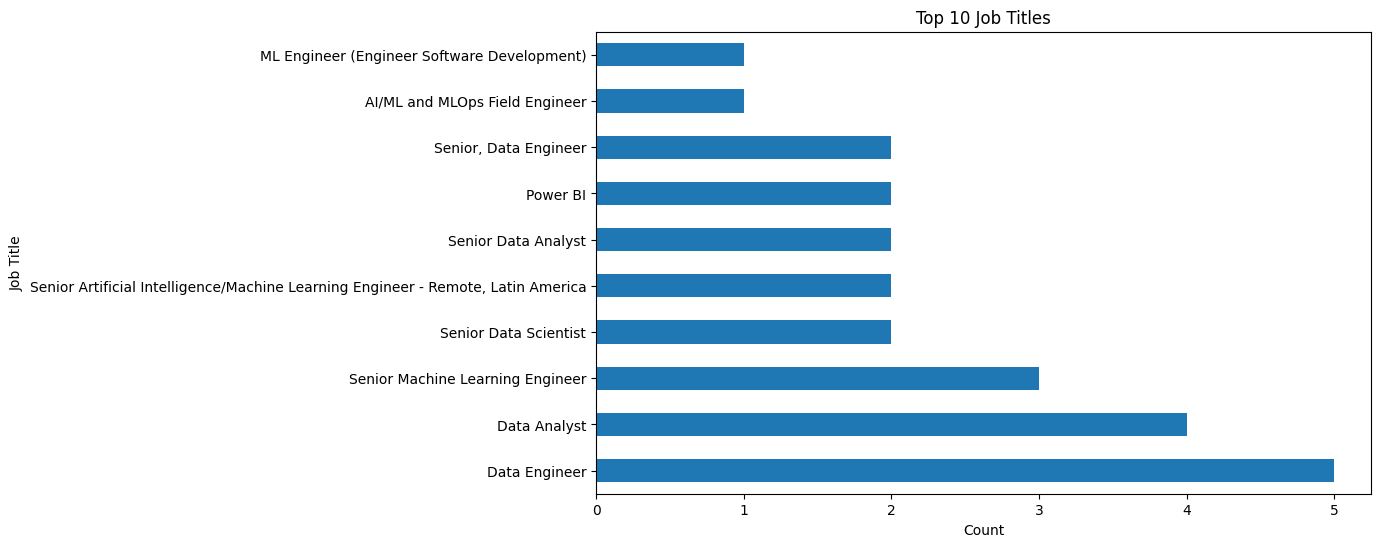

In [2]:
# Plot the distribution of job titles
title_counts = df['Title'].value_counts().head(10)  # Top 10 titles
plt.figure(figsize=(10,6))
title_counts.plot(kind='barh')
plt.title('Top 10 Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')
plt.show()


### Job Postings Over Time

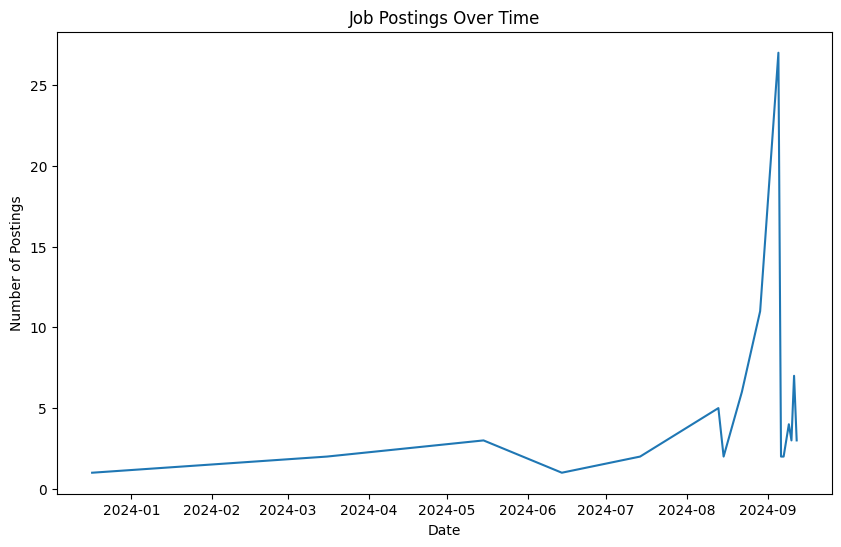

In [3]:

df['DaysSincePosted'] = pd.to_datetime(df['DaysSincePosted'])
df['PostedDate'] = pd.to_datetime('now') - (pd.to_datetime('now') - df['DaysSincePosted'])
df['PostedDate'] = df['PostedDate'].dt.date

# Plot job postings over time
plt.figure(figsize=(10,6))
df['PostedDate'].value_counts().sort_index().plot(kind='line')
plt.title('Job Postings Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Postings')
plt.show()


## Applicant Insights

### Average Number of Applicants by Seniority Level

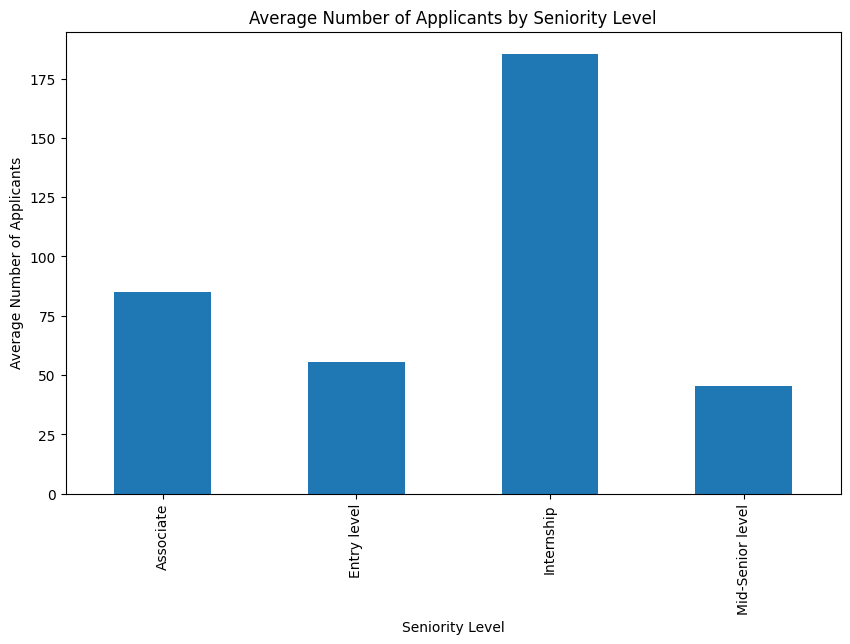

In [4]:

seniority_avg_applicants = df.groupby('SeniorityLevel')['NumApplicants'].mean()

# Plot
plt.figure(figsize=(10,6))
seniority_avg_applicants.plot(kind='bar')
plt.title('Average Number of Applicants by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Number of Applicants')
plt.show()

## Skill Demand Analysis

### Most In-Demand Skills

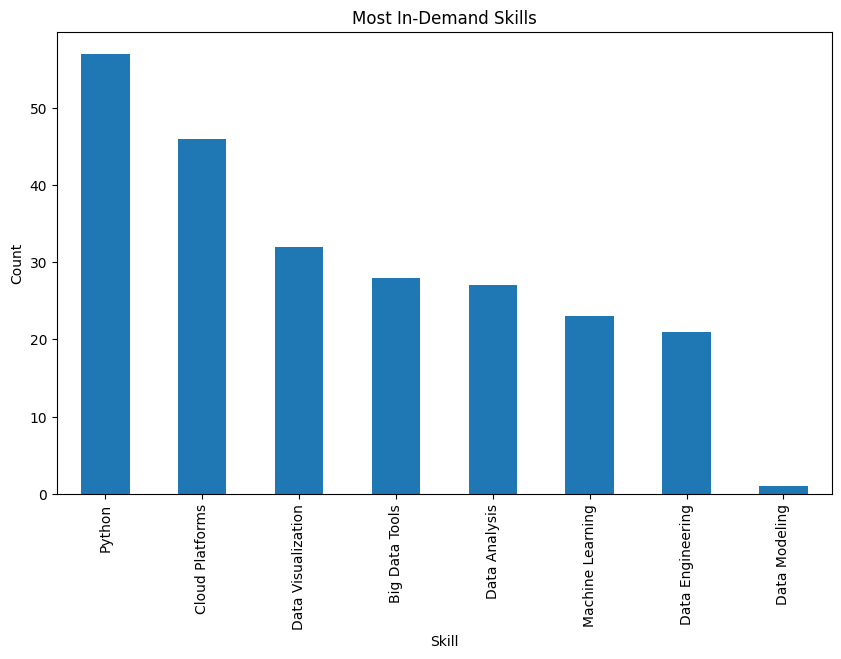

In [5]:

skill_demand = df[['Machine Learning', 'Data Engineering', 'Python', 'Data Analysis', 'Big Data Tools', 'Cloud Platforms', 'Data Modeling', 'Data Visualization']].sum().sort_values(ascending=False)

# Plot the demand for skills
plt.figure(figsize=(10,6))
skill_demand.plot(kind='bar')
plt.title('Most In-Demand Skills')
plt.xlabel('Skill')
plt.ylabel('Count')
plt.show()


## Seniority Level vs. Experience

### Seniority Level and Required Experience

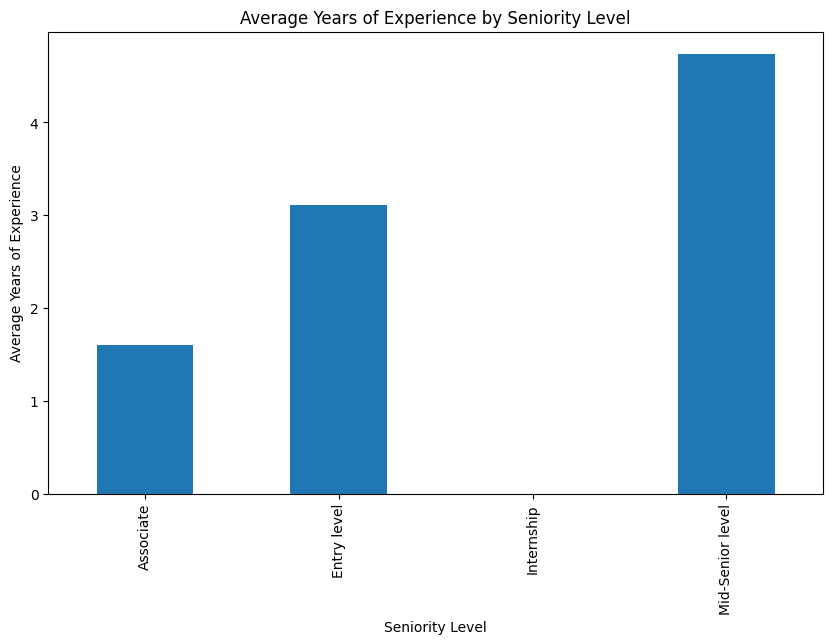

In [6]:

seniority_experience = df.groupby('SeniorityLevel')['MinYoE'].mean()

# Plot
plt.figure(figsize=(10,6))
seniority_experience.plot(kind='bar')
plt.title('Average Years of Experience by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Years of Experience')
plt.show()


## Industry Distribution

### Industry Hiring the Most for Data Science Roles

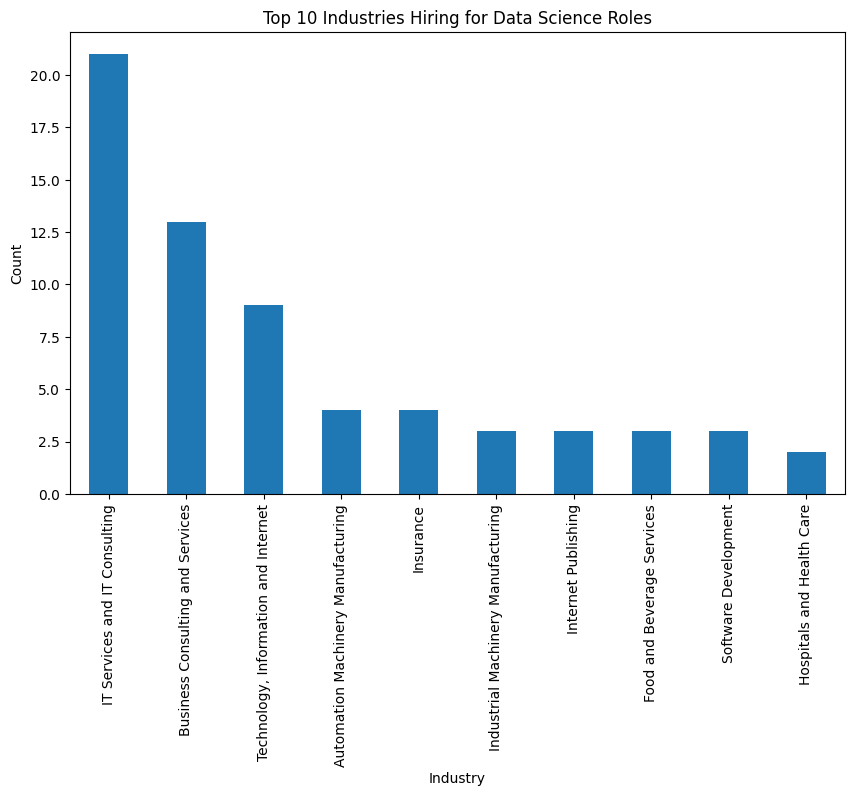

In [7]:

industry_counts = df['Industries'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,6))
industry_counts.plot(kind='bar')
plt.title('Top 10 Industries Hiring for Data Science Roles')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()


## Remote Job Availability

### Proportion of Remote Jobs

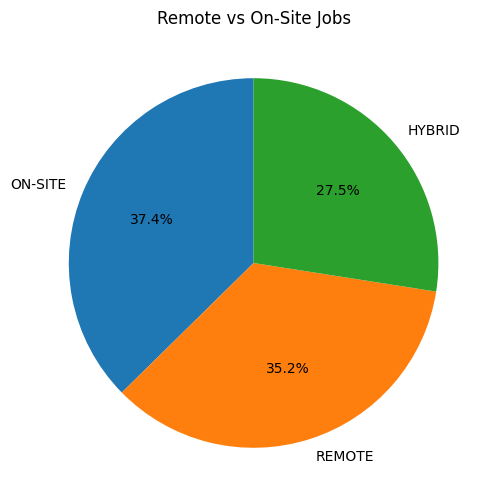

In [8]:

remote_counts = df['Remote'].value_counts()

# Plot
plt.figure(figsize=(6,6))
remote_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Remote vs On-Site Jobs')
plt.ylabel('')
plt.show()


## Education and Experience

### Correlation Between Minimum Level of Studies and Years of Experience

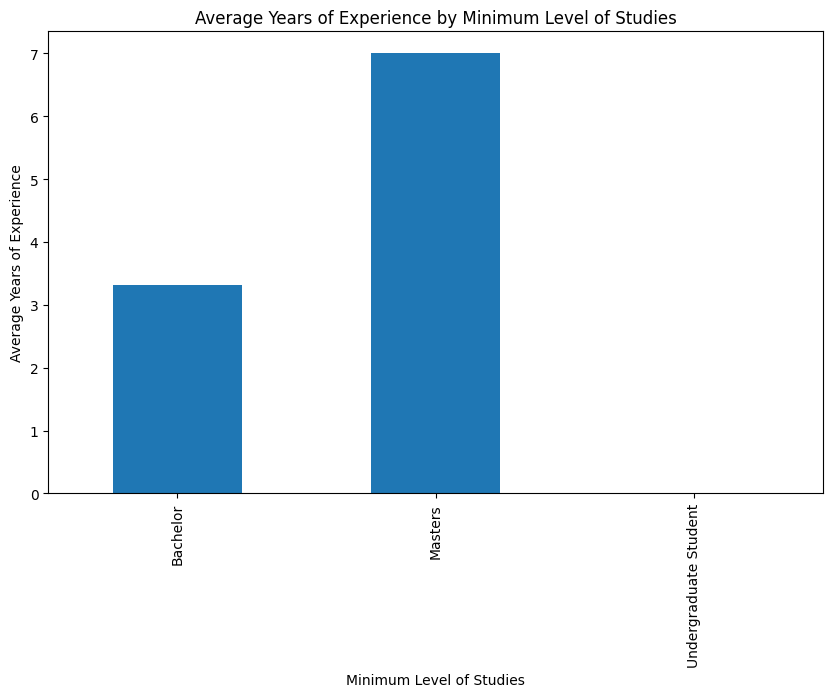

In [9]:

education_experience = df.groupby('MinLevelStudies')['MinYoE'].mean()

# Plot
plt.figure(figsize=(10,6))
education_experience.plot(kind='bar')
plt.title('Average Years of Experience by Minimum Level of Studies')
plt.xlabel('Minimum Level of Studies')
plt.ylabel('Average Years of Experience')
plt.show()


In [10]:
# Assuming df is your DataFrame
skill_columns = [
    'Machine Learning', 'Data Engineering', 'Python', 'Data Analysis', 'Big Data Tools',
    'Cloud Platforms', 'Data Modeling', 'Data Visualization', 'Database Management',
    'Front-End Development', 'Infrastructure as Code (IaC) and Automation', 'Networking',
    'Testing and Quality Assurance'
]

# Sum the occurrences of each skill across the dataset
common_skills = df[skill_columns].sum().sort_values(ascending=False)

# Display the result
print(common_skills)

Database Management                            64
Python                                         57
Cloud Platforms                                46
Data Visualization                             32
Big Data Tools                                 28
Data Analysis                                  27
Machine Learning                               23
Data Engineering                               21
Infrastructure as Code (IaC) and Automation    18
Front-End Development                           2
Data Modeling                                   1
Networking                                      0
Testing and Quality Assurance                   0
dtype: int64


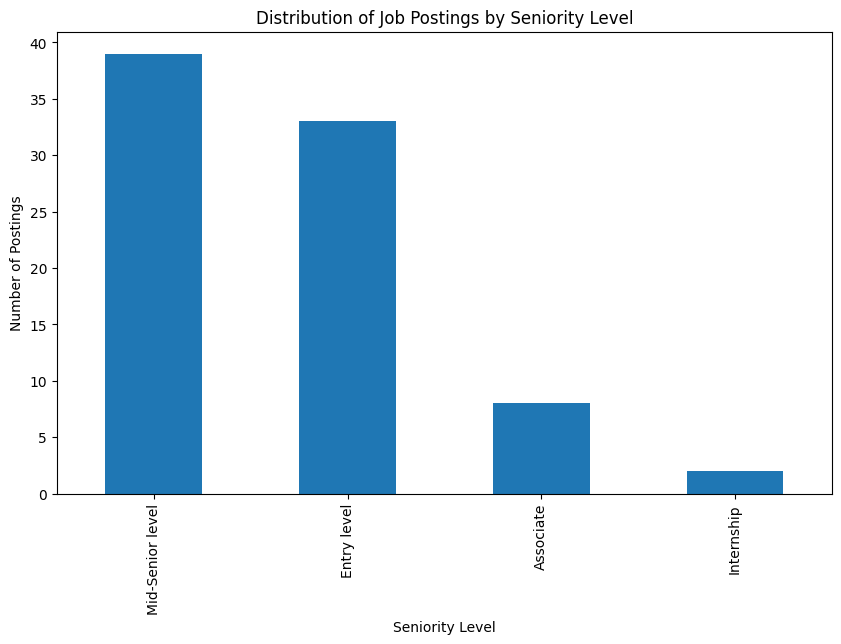

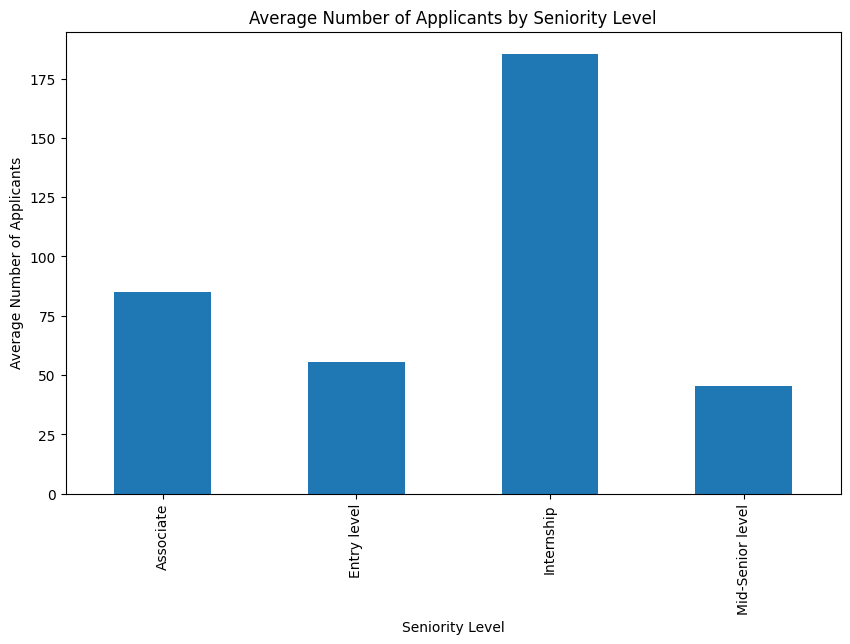

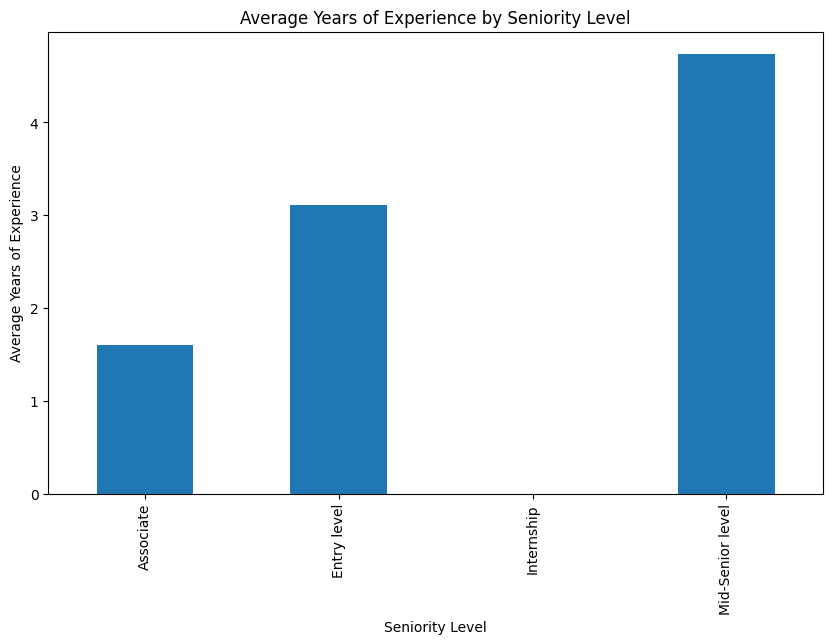

In [11]:
# 1. Distribution of Job Postings by Seniority Level
seniority_counts = df['SeniorityLevel'].value_counts()

plt.figure(figsize=(10, 6))
seniority_counts.plot(kind='bar')
plt.title('Distribution of Job Postings by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Number of Postings')
plt.show()

# 2. Average Number of Applicants by Seniority Level
seniority_avg_applicants = df.groupby('SeniorityLevel')['NumApplicants'].mean()

plt.figure(figsize=(10, 6))
seniority_avg_applicants.plot(kind='bar')
plt.title('Average Number of Applicants by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Number of Applicants')
plt.show()

# 3. Average Required Years of Experience by Seniority Level
seniority_avg_experience = df.groupby('SeniorityLevel')['MinYoE'].mean()

plt.figure(figsize=(10, 6))
seniority_avg_experience.plot(kind='bar')
plt.title('Average Years of Experience by Seniority Level')
plt.xlabel('Seniority Level')
plt.ylabel('Average Years of Experience')
plt.show()


Mean Squared Error: 0.4636543418946918
R-squared: 0.22080311987142076


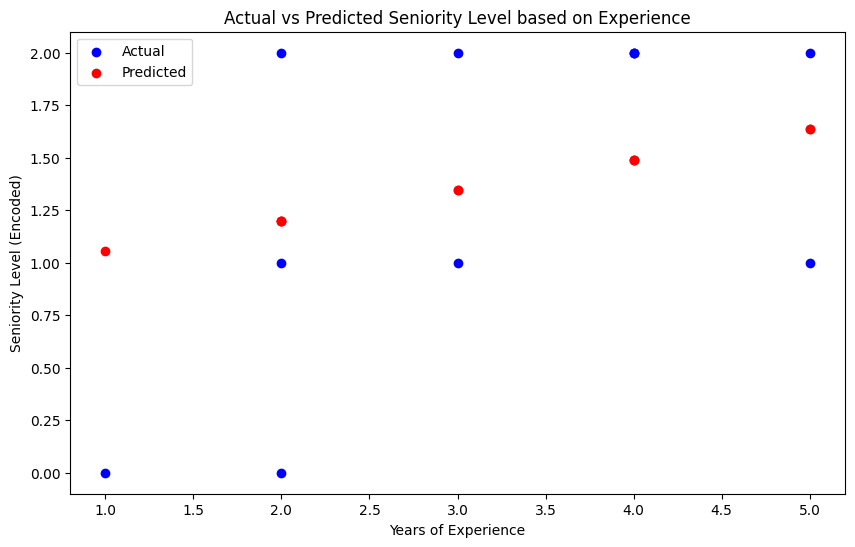

Seniority Level Mapping: {'Associate': 0, 'Entry level': 1, 'Mid-Senior level': 2}


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Encode Seniority Level as numerical values
df = df.dropna(subset=['MinYoE', 'SeniorityLevel'])  # Drop rows with missing experience or seniority
label_encoder = LabelEncoder()
df['SeniorityLevelEncoded'] = label_encoder.fit_transform(df['SeniorityLevel'])

# Step 2: Select relevant features
# We'll use 'MinYoE' (years of experience) to predict 'SeniorityLevelEncoded'
X = df[['MinYoE']]  # Predictor
y = df['SeniorityLevelEncoded']  # Target variable (encoded seniority level)

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Step 5: Predictions
y_pred = regressor.predict(X_test)

# Step 6: Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 7: Visualization - Actual vs Predicted Seniority Level
plt.figure(figsize=(10,6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Seniority Level based on Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Seniority Level (Encoded)')
plt.legend()
plt.show()

# To see the mapping of seniority levels to their encoded values
print(f"Seniority Level Mapping: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")


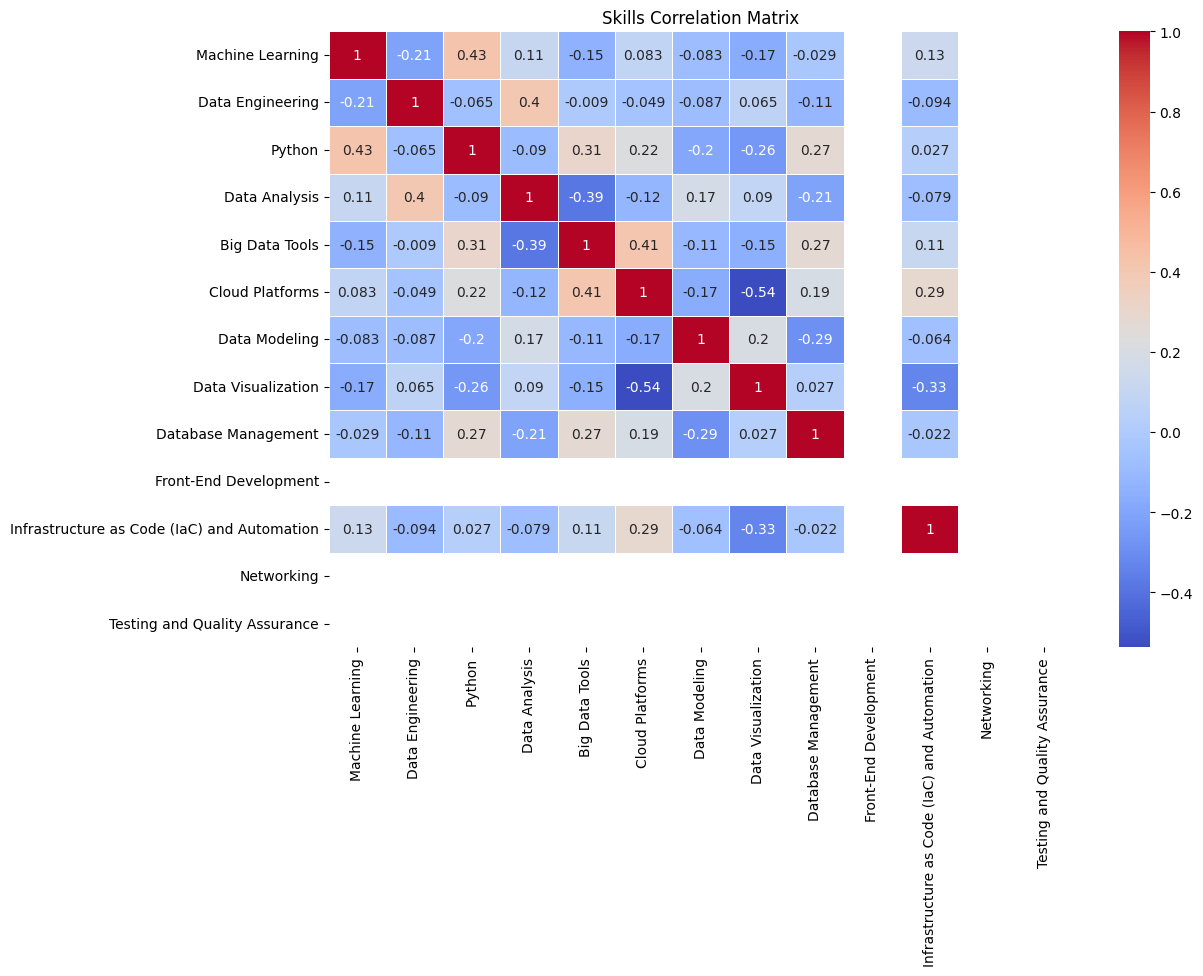

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the columns representing skills
skill_columns = [
    'Machine Learning', 'Data Engineering', 'Python', 'Data Analysis', 'Big Data Tools',
    'Cloud Platforms', 'Data Modeling', 'Data Visualization', 'Database Management',
    'Front-End Development', 'Infrastructure as Code (IaC) and Automation', 'Networking',
    'Testing and Quality Assurance'
]

# Filter the dataset to only include these skill columns
skills_data = df[skill_columns]

# Calculate the correlation matrix for the skills
skills_corr = skills_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(skills_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Skills Correlation Matrix')
plt.show()


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Select the relevant features for prediction
features = [
    'Machine Learning', 'Data Engineering', 'Python', 'Data Analysis', 'Big Data Tools',
    'Cloud Platforms', 'Data Visualization', 'Database Management',
    'Infrastructure as Code (IaC) and Automation', 'English', 'YoE', 'Remote'
]

# Drop rows with missing values in selected columns
df_clean = df.dropna(subset=features + ['SeniorityLevel'])

# Encode categorical variables (Remote and SeniorityLevel)
df_clean['RemoteEncoded'] = LabelEncoder().fit_transform(df_clean['Remote'])
df_clean['SeniorityLevelEncoded'] = LabelEncoder().fit_transform(df_clean['SeniorityLevel'])

# Define the feature set (X) and the target variable (y)
X = df_clean[features + ['RemoteEncoded']]
y = df_clean['SeniorityLevelEncoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
